 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JuiXnrL99eZzIiRzdtREyLlCYhF6Nc4u?usp=sharing)

# Performance Evaluation, Cross Validation and Hyper - Parameter Tunning
In this Notebook, we will learn 3 things:   
*  Evaluation metrics
*  Cross Validation
*  Hyperparameter Tuning 

### Data Description
Here we will use diabetes dataset for classification. Given different medical specifications about a person, we have to predict if the person have diabetes or not.

**Different Attributes:**
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

All the feature names are numerical. Let's give textual names to these features.
*  Number of times pregnant: **num_preg**
*  Plasma glucose concentration a 2 hours in an oral glucose tolerance test: **plasma_glucose_conc**
*  Diastolic blood pressure (mm Hg): **D_blood_pressure**
*  Triceps skin fold thickness (mm): **skin_fold_thickness**
*  2-Hour serum insulin (mu U/ml): **serum_insulin**
*  Body mass index (weight in kg/(height in m)^2): **body_mass_index**
*  Diabetes pedigree function: **pedigree_func**
*  Age (years): **age**
*  Class variable (0 or 1): **diabetes**

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading Data

In [2]:
# since the column names are numerical, we will give our own column names for our understanding
col = ["num_preg", "plasma_glucose_conc", "D_blood_pressure", "skin_fold_thickness", "serum_insulin", "body_mass_index", "pedigree_func", "age", "diabetes"]
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/diabetes.txt", names = col)

In [3]:
diabetes_data.head()

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
for col in diabetes_data.columns:
    pct = diabetes_data[col].isnull().sum()/len(diabetes_data[col])

    print(col + " " + str(pct*100) + "%")

# diabetes_data.info()

num_preg 0.0%
plasma_glucose_conc 0.0%
D_blood_pressure 0.0%
skin_fold_thickness 0.0%
serum_insulin 0.0%
body_mass_index 0.0%
pedigree_func 0.0%
age 0.0%
diabetes 0.0%


<AxesSubplot:>

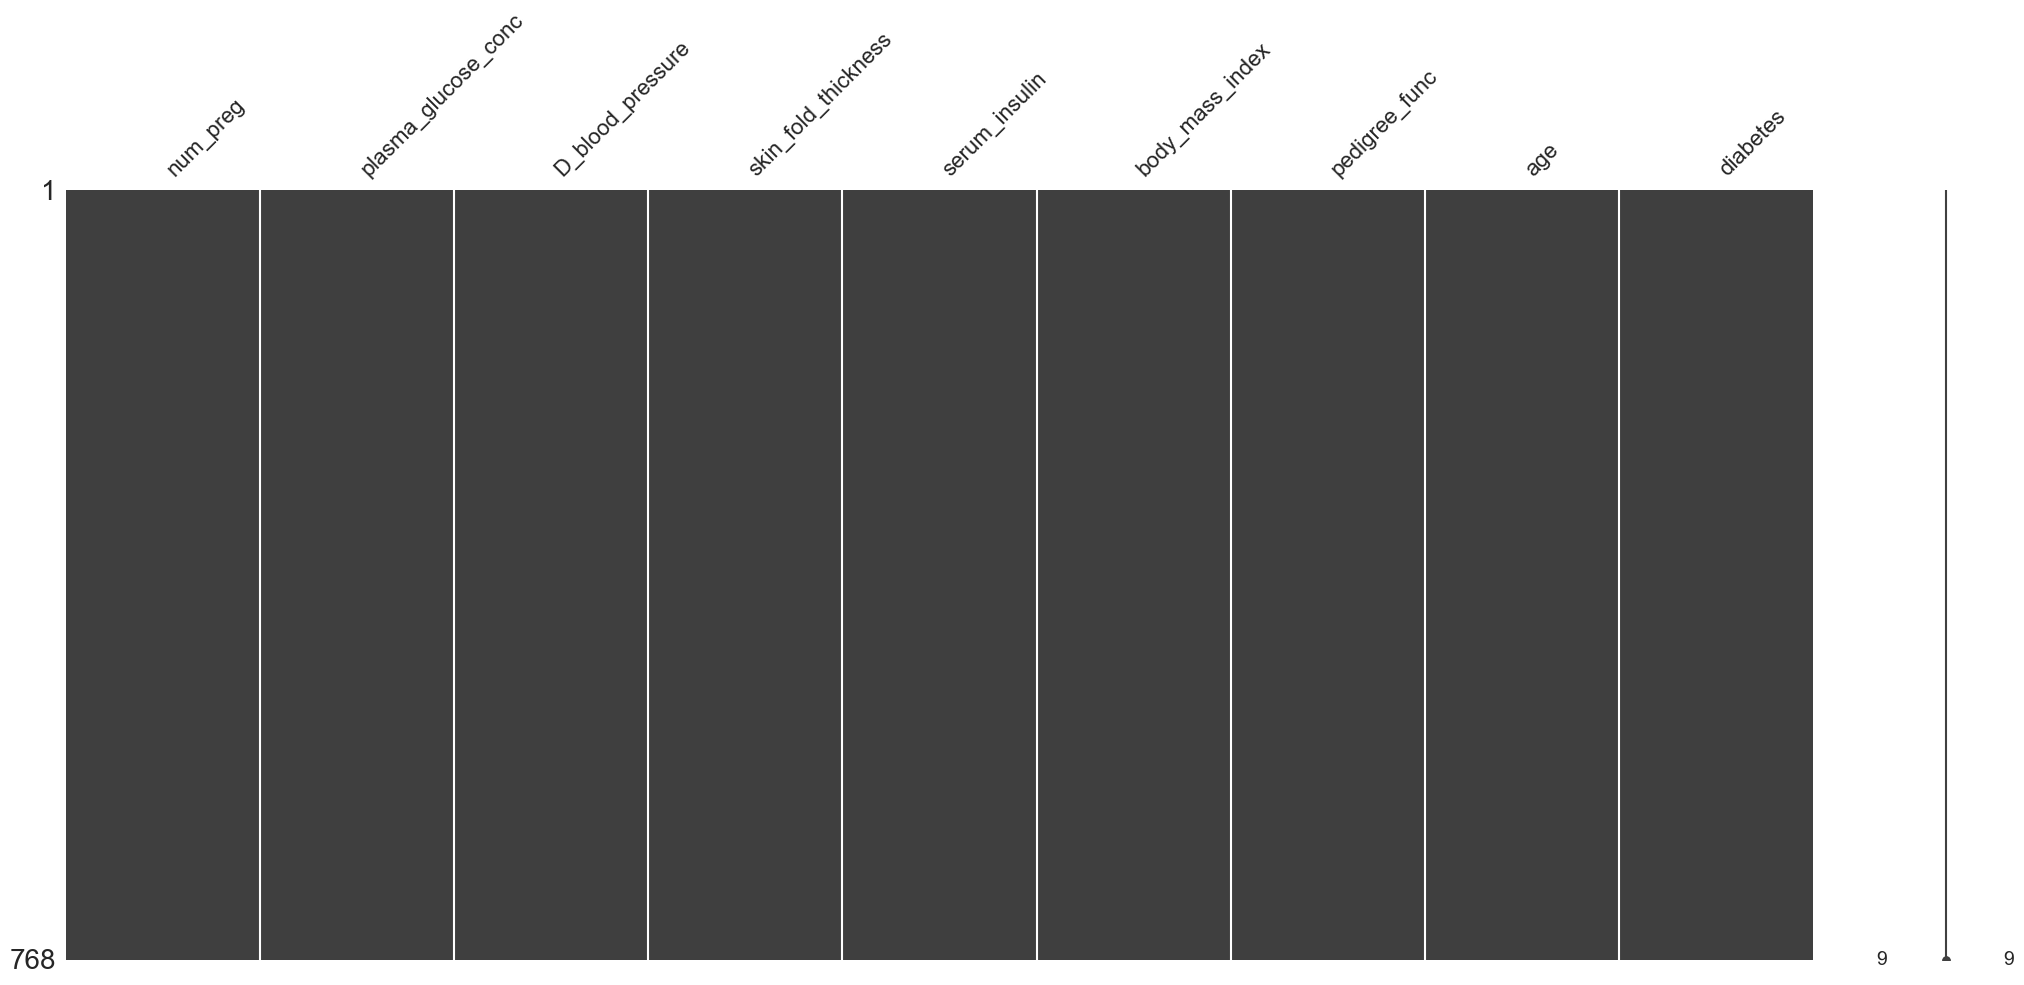

In [5]:
import missingno as msno

msno.matrix(diabetes_data)

In [6]:
diabetes_data.describe()

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


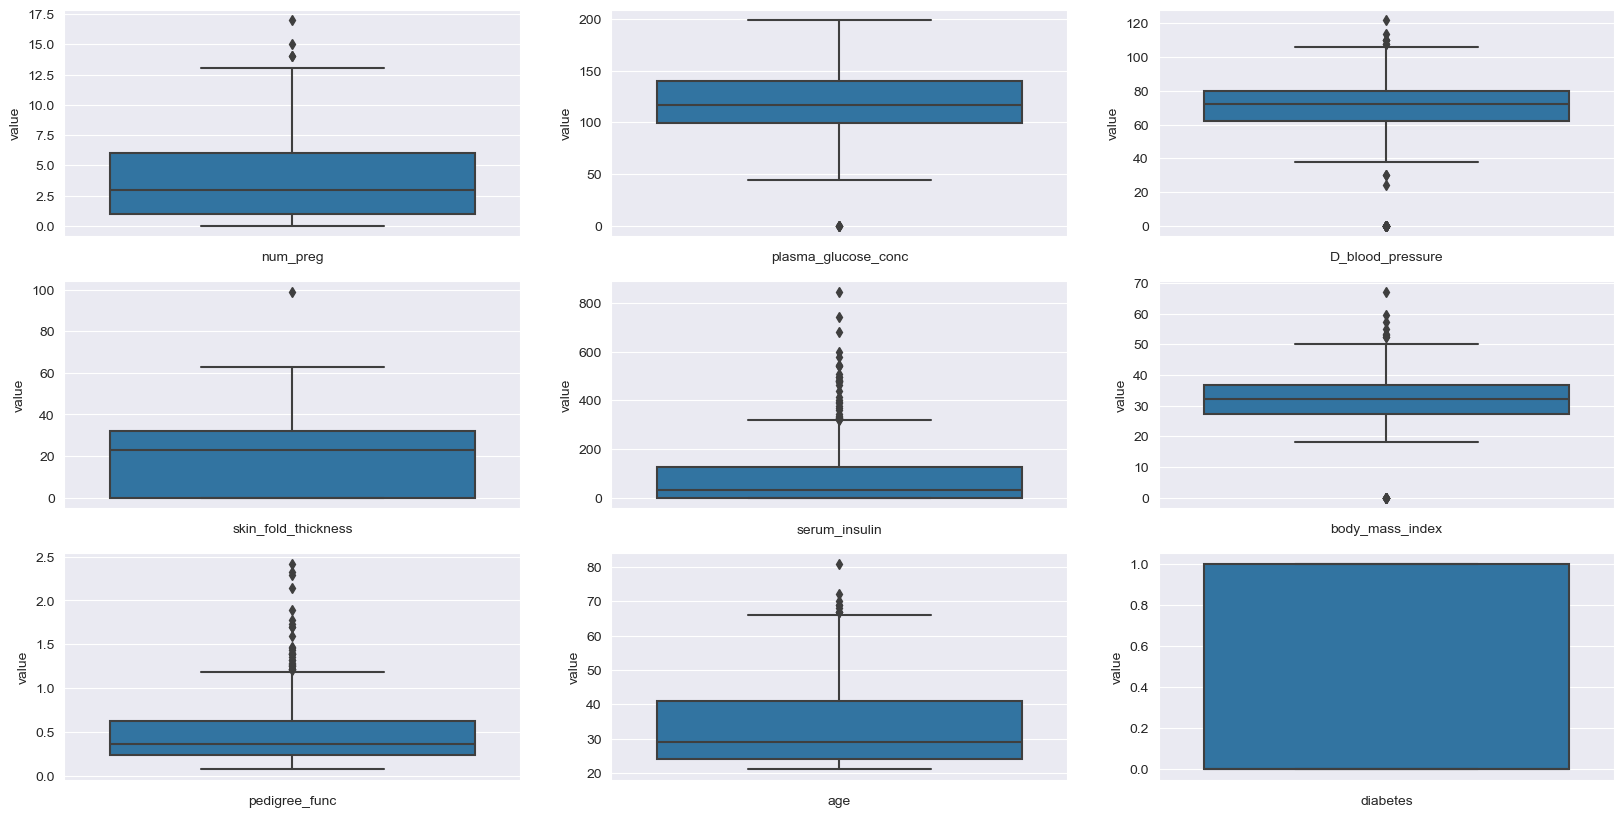

In [7]:
import seaborn as sns

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

for col, index in zip(diabetes_data, ax.flatten()):

    sns.boxplot(y = diabetes_data[col], ax = index).set(xlabel=col, ylabel = 'value')


### I would say that I would handle the outliers on pedigree_func, insulin and skin_fold_thickness

**This dataset contains 13 columns and based on different features, it is guessed whether or not a person has Diabetes**

### Separating Input variables and output variable

In [8]:
X = diabetes_data.drop('diabetes', axis = 1)
y = diabetes_data.diabetes

#### Split into training and testing (80:20)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# The below line of code will not need to separate input variables and output variables.
# The code is very simple if you remember numpy and pandas session. Indexing dataframe and arrays
# x_train, x_test, y_train, y_test = train_test_split(diabetes.iloc[:, :-1], diabetes.iloc[:,-1], test_size=0.2, random_state=3)

**Note for learners:** Here we have used MLPClassifier from neural_network module of sklearn library. MLP Classifier is also a classification algorithm like logistic regression or decision tree. We will soon learn about Neural Networks and Artificial Neural Networks in the upcoming sessions. So, no need to worry about it. 

### Developing a model

In [10]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

## Performance Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics. Accuracy score is one among them.

**Why accuracy score is not a good evaluation metric?**

Our model may give satisfying results if we use accuracy score for a particular dataset but at the same time accuracy score is not a good measure of evaluation for some particular dataset like fraud detection that we discussed during class imbalance problem. Let's consider the same dataset, suppose we have 1000 transaction in the dataset. Out of 1000 transactions 20 transactions are fraud transactions. Now let's say you build a model which predicted all the 1000 transactions as not fraud transaction, for 980 transaction which were not fraud, the prediction is correct while the transaction which were actually fraud are also predicted as not fraud. The accuracy is nothing but total correct prediction divided by total prediction. In this case we have total prediction as 1000 (as we have 1000 transactions) while total correct prediction is 980, resulting the accuracy score of 980/1000 = 0.98. The model is giving 98% of accuracy. Do you think the model is good? No, because our model could not notice the transaction which were actually fraud. 

Here we will discuss some other metrices for both classification and regression.

## 1. Evaluation Metrics

**All performance metrics in sklearn are to be written in the same way -**  
> ``` metric_function(true_label, predicted_labels) ```

Below are the metrics for classification problems.

### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

Further reading about confusion matrix and its related terminologies: 
1. https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
2. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [11]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

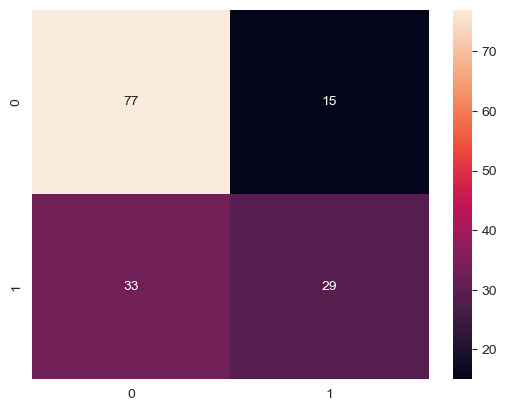

In [12]:
confusion_matrix(y_test, y_pred)
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True)

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 29
True Negative 77
False Positive 15
False Negative 33


### Accuracy
\begin{align}
Accuracy = \frac{TP+TN}{TP+TN+FN+FP}
\end{align}

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.6883116883116883

**When is it good to use accuracy score as a model evaluation metric?**
1. The classifications in the dataset is nearly symmetrical (means equal distribution of all the classes).
2. The false positive and false negative on test data are nearly equal.

### Recall (Sensitivity)
\begin{align}
Sensitivity = \frac{TP}{TP+FN}
\end{align}

In [15]:
from sklearn.metrics import recall_score

In [16]:
recall_score(y_test, y_pred)

0.46774193548387094

In [17]:
print(tp/(tp+fn))

0.46774193548387094


### Specificity
sklearn does not have an inbuild function for Specificity. But by adding parameter pos_label =0 to the recall function, we treat that as the positive class, and hence gives the correct output
\begin{align}
Specificity = \frac{TN}{TN+FP}
\end{align}

In [18]:
print("Specificity with recall pos label=0: ",recall_score(y_test, y_pred, pos_label=0))

Specificity with recall pos label=0:  0.8369565217391305


In [19]:
print(tn/(tn+fp))

0.8369565217391305


**Checking with formulas (tn , fp from confusion matrix):**

In [20]:
print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with Formulas:  0.8369565217391305


They are the same! You can use either one of them!

### Precision
\begin{align}
Precision = \frac{TP}{TP+FP}
\end{align}

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.75

In [34]:
tp / (tp + fp)

0.75

### Imbalanced Datasets

In [21]:
diabetes_data.iloc[:,-1].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

### Matthews Correlation Coefficient
\begin{align}
MCC = \frac{(TP*TN)-(FP*FN)}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
\end{align}

In [22]:
from sklearn.metrics import matthews_corrcoef
print("MCC Score: ",matthews_corrcoef(y_test, y_pred))

MCC Score:  0.3307785452577072


### F1 Score
It is the harmonic mean of Precision and recall

\begin{align}
Precision = \frac{2*Precision*Recall}{Precision+Recall}
\end{align}

In [23]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.5471698113207547


## Area Under the Curve (Reciever Operating Characterstics)

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

[Text(0.5, 0, 'AUC: 0.6977559607293129')]

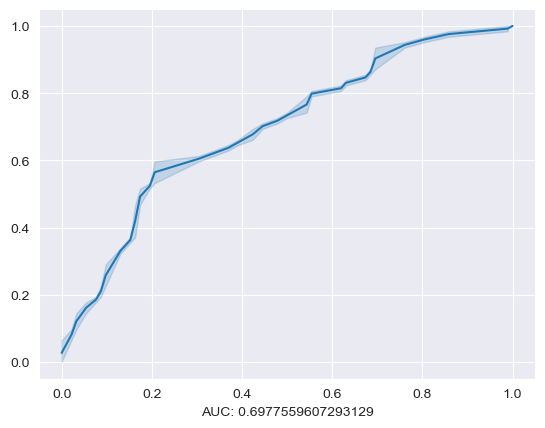

In [25]:
y_pred_prob_yes=mlp.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])

sns.lineplot(x = fpr, y = tpr).set(xlabel='AUC: ' +  str(roc_auc_score(y_test,y_pred_prob_yes[:,1])))



## 1.2 Regression Evaluation Metrics 

Wine Dataset  
    <b> Predictor Variable: </b> Quality (Tells quality of wine)

In [26]:
wine = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/winequality.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


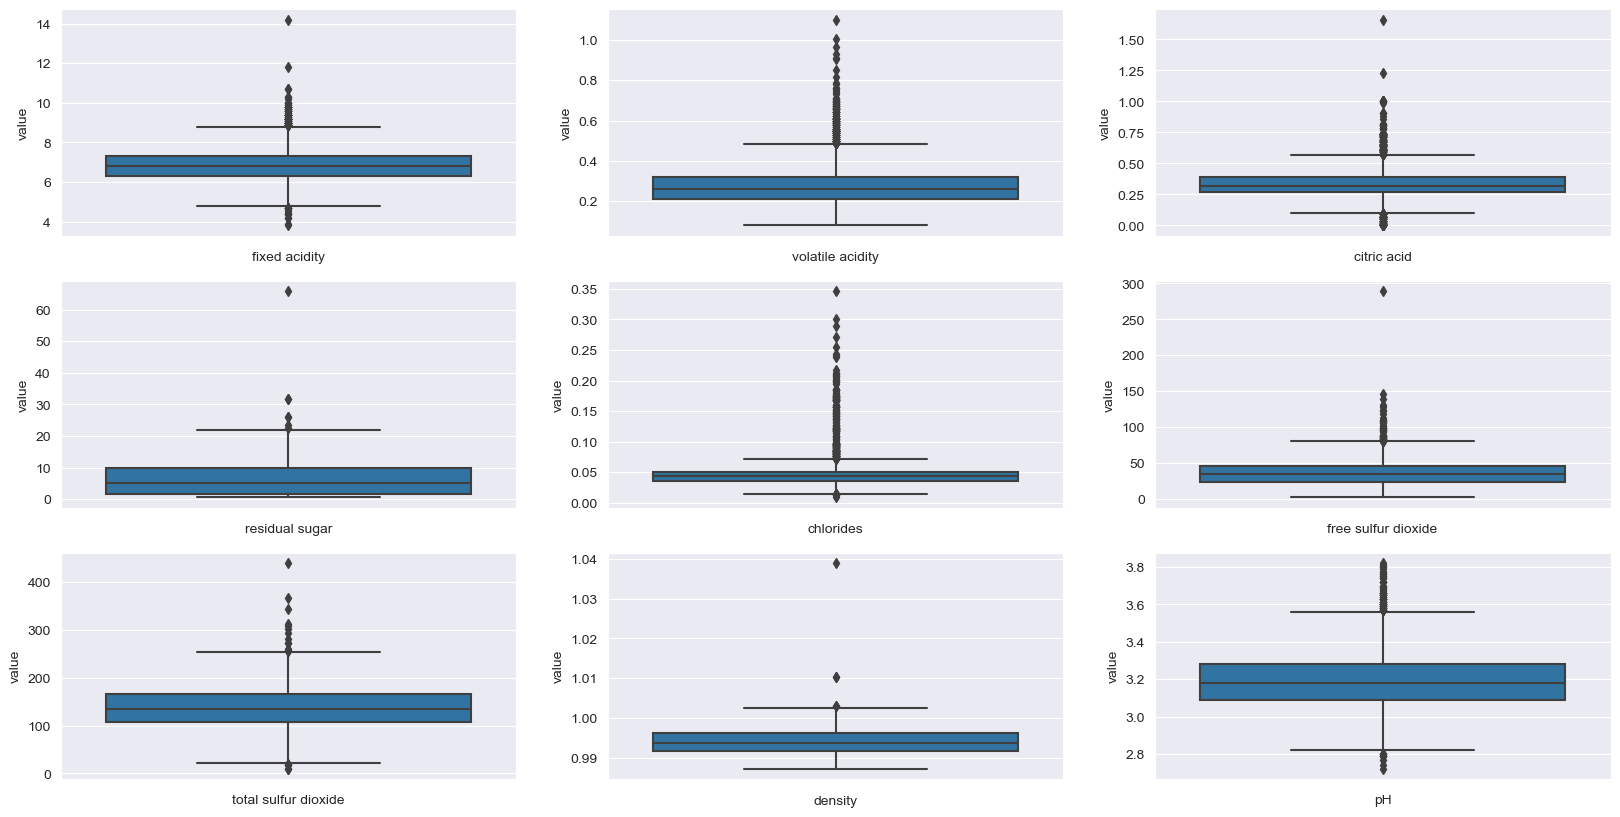

In [28]:


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

for col, index in zip(wine, ax.flatten()):

    sns.boxplot(y = wine[col], ax = index).set(xlabel=col, ylabel = 'value')


### Separate Input and Output Variables

In [29]:
X = wine.drop('quality', axis = 1)
y = wine.quality

#### Split into training and testing (80:20)

In [40]:
# Here we are performing both separation of input and output variable and the splitting.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [37]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


TypeError: float() argument must be a string or a number, not 'StandardScaler'

Creating a model

In [38]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred[:10]

array([5.44455619, 5.57868309, 5.99091469, 5.19864346, 6.0666099 ,
       5.01639077, 5.68416174, 6.26611011, 5.97010538, 5.65519351])

## Performance Measurement

Let y = Actual Value,  $\tilde{y}$ = Predicted Value

### Mean Absolute Error  
*  MAE is the absolute difference between the target value and the value predicted by the model.  
*  The MAE is more robust to outliers and does not penalize the errors as extremely as mse
\begin{align}
MAE  = \frac{1}{n}\sum|y-\tilde{y}| 
\end{align}

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.5972358558776449

### Mean Squared Error
*  It is simply the average of the squared difference between the target value and the value predicted by the regression model. 
*  As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is.
*  MSE or Mean Squared Error is one of the most preferred metrics for regression tasks. 
\begin{align}
MSE & = \frac{1}{n}\sum(y-\tilde{y})^2
\end{align}

In [43]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.5906658099548044


### Root Mean Square Error
*  RMSE is the square root of the averaged squared difference between the target value and the value predicted by the model. 
*  It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors.
*  This implies that RMSE is useful when large errors are undesired.
\begin{align}
RMSE  = \sqrt{\frac{1}{n}\sum(y-\tilde{y})^2}
\end{align}

In [44]:
print("Root Mean Squared Error: ",mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error:  0.7685478579469235


### R Squared
<li>The metric helps us to compare our current model with a constant baseline and tells us how much our model is better
\begin{align}
R^2 = 1 - \frac{MSE(Model)}{MSE(Baseline)}
\end{align}

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2832037191111062

# 2. Cross Validation
Usually, our data is divided into Train and Test Sets.
The Train set is further divided into Train and Validation set. 

The Validation Set helps us in selecting good parameters/tune the parameters for our model.

This Three fold set can be seen in the figure below:

![train-test-val](https://amueller.github.io/ml-training-intro/slides/images/threefold_split.png)

Our dataset should be as large as possible to train the model and removing considerable part of it for validation poses a problem of losing valuable portion of data that we would prefer to be able to train. 

In order to address this issue, we use the Cross validation technique. Cross Validation has a number of types out of which we'll be using K-fold cross validation today.



In [46]:
# Here the diabetes data is use
# separate input and output vairables
X = diabetes_data.drop('diabetes', axis = 1)
y = diabetes_data.diabetes

### 2.1 K-Fold Cross Validation

In [47]:
from sklearn.model_selection import cross_validate

<blockquote> We can also import cross_val_score from the same library, but it only allows a single scorer to be implemented. So we are using cross_validate </blockquote>

In [48]:
cv_results = cross_validate(mlp, X, y, cv=10, scoring=["accuracy", "precision", "recall"])
cv_results

{'fit_time': array([0.13223529, 0.38896203, 0.12928414, 0.17933941, 0.10110569,
        0.27227569, 0.12770247, 0.2752738 , 0.21192431, 0.16684198]),
 'score_time': array([0.00422311, 0.00359774, 0.00418019, 0.00317597, 0.00415277,
        0.00362039, 0.00363231, 0.00449014, 0.00316072, 0.00417542]),
 'test_accuracy': array([0.66233766, 0.66233766, 0.64935065, 0.68831169, 0.63636364,
        0.76623377, 0.74025974, 0.71428571, 0.69736842, 0.69736842]),
 'test_precision': array([0.51851852, 0.51724138, 0.5       , 0.54545455, 0.46153846,
        0.73684211, 0.66666667, 0.63157895, 0.63636364, 0.57894737]),
 'test_recall': array([0.51851852, 0.55555556, 0.51851852, 0.66666667, 0.22222222,
        0.51851852, 0.51851852, 0.44444444, 0.26923077, 0.42307692])}

**cv=10 is provided, which means we are performing 10 fold cross validation**

In [49]:
print("Accuracy: ", cv_results["test_accuracy"].mean())
print("Precision: ", cv_results["test_precision"].mean())
print("Recall: ", cv_results["test_recall"].mean())

Accuracy:  0.6914217361585783
Precision:  0.5793151628904806
Recall:  0.4655270655270655


**For all valid scoring options - use the following:**

In [50]:
import sklearn.metrics as m
m.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

For more complicated scoring metrics (such as specificity, which isn't explicilty provided by sklearn), or to create your own metrics, 
http://scikit-learn.org/stable/modules/model_evaluation.html#using-multiple-metric-evaluation

### 2.2 Leave One Out Cross Validation

<blockquote>This code takes a long time to run, you can either skip running this part and directly just see the printed results, or wait for 10-15 mins for this to run </blockquote>

In [51]:
from sklearn.model_selection import LeaveOneOut

In [52]:
cv_results = cross_validate(mlp, X, y,
                            cv=LeaveOneOut(), scoring=["accuracy"])
cv_results

{'fit_time': array([0.14069772, 0.15428138, 0.29200339, 0.24029088, 0.18135166,
        0.13763738, 0.12516594, 0.18871045, 0.17964697, 0.31173635,
        0.15267491, 0.23561645, 0.21041799, 0.21653914, 0.18815517,
        0.14702964, 0.14030361, 0.25594974, 0.13966799, 0.1217401 ,
        0.25637341, 0.1819458 , 0.22720122, 0.25492144, 0.33220863,
        0.29930854, 0.29521966, 0.14692211, 0.24396586, 0.07088327,
        0.21172714, 0.20238113, 0.23819709, 0.26693416, 0.17738008,
        0.09707379, 0.19092107, 0.17930293, 0.24910021, 0.2408886 ,
        0.27328634, 0.17097926, 0.24465847, 0.29428363, 0.10784316,
        0.33876324, 0.15194917, 0.14651275, 0.1526947 , 0.34965062,
        0.22630739, 0.27206206, 0.15070963, 0.1773634 , 0.15054679,
        0.25993967, 0.15398955, 0.30915737, 0.25937748, 0.15567183,
        0.23988867, 0.30199051, 0.12412071, 0.20474529, 0.20284557,
        0.19578576, 0.19042134, 0.18563509, 0.2958312 , 0.11172223,
        0.16039157, 0.10162401, 0.12

In [ ]:
cv_results['test_accuracy'].mean()

0.7252604166666666

We have not included precision and recall in the metrics here. Can you think why?  
**<mark>Hint:</mark> Imagine the confusion matrix when the testing has only one sample**

## 3. Hyperparameter Tuning
Hyperparameters are important parts of the ML model and can make the model gold or trash. Here we have discussed one of the popular hyperparameter tunning method i.e. using Grid Search CV. 

## 3.1 Grid Search CV

### 3.1.1 Crime Rate- Linear Regression

**Predictor Variable: Crime Rate (Regression Based)**

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/Standard%20Metropolitan%20Areas%20Data%20-%20train_data.csv")
train, test = train_test_split(crime)
x_train = train.drop('crime_rate', axis = 1)     
y_train = train.crime_rate      
x_test = test.drop('crime_rate', axis = 1)      
y_test = test.crime_rate        

Performance without grid search: 

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [56]:
mean_squared_error(y_test, y_pred, squared=False)

10.473712856340395

Performance with Grid Search

**Step 1:** Define a parameter Space

In [60]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True, False], 'n_jobs':[-1,1,10,15]}

**Step 2:** Fit the model to find the best hyperparameters on training data, and select the scorer you want to select to optimise

In [61]:
grid = GridSearchCV(lr,parameters, cv=3)
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 10, 15]})

**Step 3:** Print the best obtained parameters

In [62]:
grid.best_estimator_

LinearRegression(fit_intercept=False, n_jobs=-1)

In [63]:
grid_lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1)
grid_lr.fit(x_train, y_train)
y_pred= grid_lr.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

10.473712856340395

**Performance does not vary that much!**

The number of hyperparameters for Linear Regression is very less. Hence all of them give similar performance (in this specific dataset)

Let us try another parameter for which the performance varies a lot!

### 3.1.2 Artificial Neural Network
In Linear Regression, there are not many parameters to optimise, hence performance may not vary that much. In many other classifiers, there are a number of hyper parameters to tune, so let us see an example of how performance is improved using Grid Search. We take an example of **Artificial Neural Networks.**

You need not understand the working behind ANN, so it is okay if you do not understand the parameter grid in detail. Let's just see how the performance improves by applying Grid Search.

In [64]:
# Use diabetes data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**Step 1:** Define a parameter Space

In [65]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.01, 0.001, 0.05],
    'learning_rate': ['constant','adaptive','invscaling'],
}

**Step 2:** Fit the model to find the best hyperparameters on training data, and select the scorer you want to select to optimise

<blockquote> <i>  This code takes a long time to run, you can either skip running this part and directly just see the printed results, or wait for 10-15 mins for this to run </blockquote>

In [66]:
mlp_random = GridSearchCV(mlp, parameter_space, scoring = 'accuracy')
mlp_random.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.01, 0.001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             scoring='accuracy')

**Step 3:** Print the best obtained parameters

In [67]:
mlp_random.best_params_

{'activation': 'logistic',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'invscaling',
 'solver': 'adam'}

**Step 4:** Train your model on these parameters

In [68]:
mlp_grid = MLPClassifier(solver='adam', learning_rate='invscaling', hidden_layer_sizes=(50,50,50), alpha=0.05,
                         activation='logistic',max_iter=2000)

In [69]:
mlp_grid.fit(x_train, y_train)
y_pred = mlp_grid.predict(x_test)
acc_tuned = accuracy_score(y_test, y_pred)

**Comparing with Accuracy from model without hyperparameter tuning**

In [70]:
print("Accuracy of Tuned model: ",np.round(acc_tuned,3))
print("Accuracy of non-Tuned model: ",np.round(acc,3))

Accuracy of Tuned model:  0.708
Accuracy of non-Tuned model:  0.688


Approximately 5% difference in accuracy!  
By including an even more exhaustive grid search, we can improve the performance even further